[3.1105853061982733, 2.8962848004761437, 2.8187318836712576, 2.78668139226859, 2.773325385716858, 2.7680615793746477, 2.766026112928347, 2.765219308299035, 2.764877181144715, 2.7647152162361173, 2.764627276521936, 2.7645728635269062, 2.7645357572477876, 2.7645088937324807, 2.7644888018705043, 2.764473523398976, 2.764461809770952, 2.7644527933951775, 2.7644458397610414, 2.764440471919209, 2.764436326327747, 2.764433123966667, 2.7644306499585976, 2.764428738546803, 2.764427261760948, 2.7644261207629977, 2.7644252392000053, 2.764424558083168, 2.7644240318368314, 2.7644236252478778, 2.7644233111094305, 2.764423068400518, 2.7644228808796543, 2.7644227359981914, 2.7644226240607113, 2.7644225375763067, 2.764422470757344, 2.7644224191321864, 2.764422379245971, 2.764422348429415, 2.7644223246201913, 2.7644223062249167, 2.764422292012523, 2.764422281031872, 2.7644222725481007, 2.7644222659934474, 2.7644222609292513, 2.7644222570165997, 2.7644222539936427, 2.7644222516580736]
[13.873439357316109,

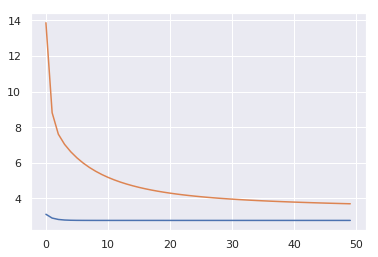

In [3]:
import  numpy as np
from scipy.sparse import rand
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

I = 10
J = 20
K = 3
MaxIterALS = 50
eta = 0.01
d = 0.1



Wtrue = rand(I, K, d).todense()
Htrue = rand(K, J, d).todense()

X = Wtrue @ Htrue + np.random.rand(I, J)

Wals = 2 * np.random.rand(I, K)
Hals = 2 * np.random.rand(K, J)
Wgd = Wals
Hgd = Hals

errals = []
errgd = []
for i in range(MaxIterALS):
    Wals = X @ Hals.transpose() @ np.linalg.inv(Hals @ Hals.transpose())
    Hals = (np.linalg.inv(Wals.transpose() @ Wals)) @ Wals.transpose() @ X
    Wgd = Wgd + eta * (X - Wgd @ Hgd) @ Hgd.transpose()
    Hgd = Hgd + eta * Wgd.transpose() @ (X - Wgd @ Hgd)
    errals.append(np.linalg.norm(X - Wals @ Hals))
    errgd.append(np.linalg.norm(X - Wgd @ Hgd))
print(errals)
print(errgd)
plt.plot(errals, label="errals")
plt.plot(errgd, label="errgd")
plt.show()